In [1]:
import time
import tensorflow as tf
import pandas as pd
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import json
import re
import nltk
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [16]:
df1 = pd.read_csv("true.csv",header=0)
df1 = df1[['Head','Body','Label']]
columns = ['Title','Body','Label']
df1=df1.replace(r'\n',' ',regex=True)
df1

,Head,Body,Label
0,Four more arrested in Rinku Sharma murder case,Delhi Police on Sunday arrested four more per...,0
1,Unnao case | Police adds poisoning charge; sa...,The police on Saturday added a charge relate...,0
2,The man who follows India’s rivers on foot,Siddharth Agarwal has been following India’s ...,0
3,Realtor takes tips from movie to burgle frien...,"A realtor, who had sustained huge losses, all...",0
4,Voting underway for polls to 6 municipal corp...,Elections to six municipal corporations in G...,0
...,...,...,...
3855,Assam Assembly Elections | CAA will be implem...,Assam BJP president Ranjeet Kumar Dass has sa...,0
3856,Data | Assembly elections 2021: Voter turnout...,"Compared to the 2016 Assembly election, turno...",0
3857,Ernakulam constituency baffles political part...,The reluctance of voters in Ernakulam Assembl...,0
3858,Idukki constituency in the limelight,The electoral prospects of two leaders who we...,0


In [15]:
df_f = pd.read_csv("false.csv",header=0,encoding='unicode_escape')
df_f = df_f[['Head','Body','Label']]
columns = ['Title','Body','Label']
df_f=df_f.replace(r'\n',' ',regex=True)
df_f

,Head,Body,Label
0,âSitting upon a volcanoâ: Doctors in Benga...,The population of West Bengal is three times t...,1
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1
...,...,...,...
2993,Bollywood Celebrities Mistakenly Take Covid Va...,The second wave of COVID-19 seems deadlier tha...,1
2994,WHO Successfully Convinces Corona Virus To Ent...,"In a major victory against the coronavirus, th...",1
2995,Government Likely To Request Punjab Youth To A...,WorldÃ¢ÂÂs largest COVID-19 Vaccine drive by...,1
2996,Brown Mom Gets Four COVID-19 Vaccines Packed A...,India started the worldÃ¢ÂÂs biggest Covid-1...,1


In [17]:
df = df1.append(df_f)
df

,Head,Body,Label
0,Four more arrested in Rinku Sharma murder case,Delhi Police on Sunday arrested four more per...,0
1,Unnao case | Police adds poisoning charge; sa...,The police on Saturday added a charge relate...,0
2,The man who follows India’s rivers on foot,Siddharth Agarwal has been following India’s ...,0
3,Realtor takes tips from movie to burgle frien...,"A realtor, who had sustained huge losses, all...",0
4,Voting underway for polls to 6 municipal corp...,Elections to six municipal corporations in G...,0
...,...,...,...
2993,Bollywood Celebrities Mistakenly Take Covid Va...,The second wave of COVID-19 seems deadlier tha...,1
2994,WHO Successfully Convinces Corona Virus To Ent...,"In a major victory against the coronavirus, th...",1
2995,Government Likely To Request Punjab Youth To A...,WorldÃ¢ÂÂs largest COVID-19 Vaccine drive by...,1
2996,Brown Mom Gets Four COVID-19 Vaccines Packed A...,India started the worldÃ¢ÂÂs biggest Covid-1...,1


In [18]:
df_cleaned = df.copy()
df_cleaned.columns= columns
df_cleaned = df_cleaned.dropna(how='any')
df_cleaned 

,Title,Body,Label
0,Four more arrested in Rinku Sharma murder case,Delhi Police on Sunday arrested four more per...,0
1,Unnao case | Police adds poisoning charge; sa...,The police on Saturday added a charge relate...,0
2,The man who follows India’s rivers on foot,Siddharth Agarwal has been following India’s ...,0
3,Realtor takes tips from movie to burgle frien...,"A realtor, who had sustained huge losses, all...",0
4,Voting underway for polls to 6 municipal corp...,Elections to six municipal corporations in G...,0
...,...,...,...
2993,Bollywood Celebrities Mistakenly Take Covid Va...,The second wave of COVID-19 seems deadlier tha...,1
2994,WHO Successfully Convinces Corona Virus To Ent...,"In a major victory against the coronavirus, th...",1
2995,Government Likely To Request Punjab Youth To A...,WorldÃ¢ÂÂs largest COVID-19 Vaccine drive by...,1
2996,Brown Mom Gets Four COVID-19 Vaccines Packed A...,India started the worldÃ¢ÂÂs biggest Covid-1...,1


In [19]:
df_real = df_cleaned[df_cleaned.Label ==0]
df_fake = df_cleaned[df_cleaned.Label ==1]

In [20]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.sample(frac=1)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned['Label'].unique()

array([1, 0], dtype=int64)

In [22]:
df_cleaned[df_cleaned['Label']==1].count()

Title    1737
Body     1737
Label    1737
dtype: int64

In [23]:
df_cleaned[df_cleaned['Label']==0].count()

Title    2824
Body     2824
Label    2824
dtype: int64

In [24]:
np.savez('Title_Data',inputs=df_cleaned.iloc[:,0],targets=df_cleaned.iloc[:,2])
np.savez('Content_Data',inputs=df_cleaned.iloc[:,1],targets=df_cleaned.iloc[:,2])

In [25]:
df1_cleaned_real = df_cleaned[df_cleaned.Label == 0]
df1_cleaned_fake = df_cleaned[df_cleaned.Label == 1]

There are 161225 words in the combination of all Real News.


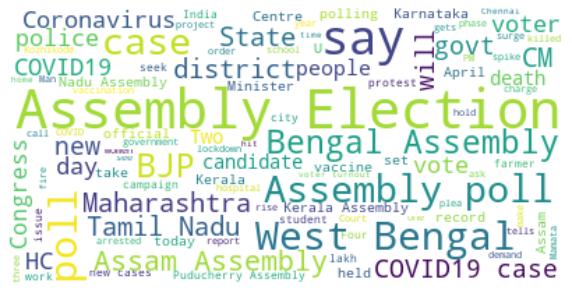

In [27]:
from wordcloud import WordCloud, STOPWORDS
combined_real = []

for i in range(df1_cleaned_real.shape[0]):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', df1_cleaned_real.iloc[i,0])
    combined_real.append(sentence)

texts = " ".join(text for text in combined_real)

print ("There are {} words in the combination of all Real News.".format(len(texts)))
stopwords = set(STOPWORDS)

wordcloud_real = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(texts)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

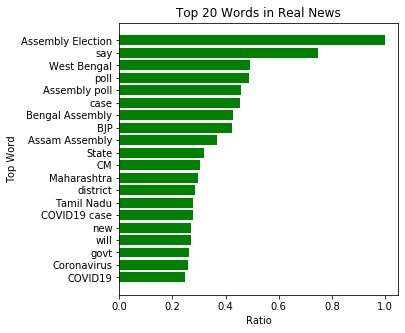

In [28]:
import itertools  
Top20RealWords = dict(itertools.islice(wordcloud_real.words_.items(), 20))
TopWords_real = []
Ratios_real = []

for name, age in Top20RealWords.items():
    TopWords_real.append(name)
    Ratios_real.append(age)

ind = np.arange(len(TopWords_real))    

plt.figure(figsize=[5,5])
plt.barh(TopWords_real,Ratios_real, align='center', color='green')
plt.xlabel('Ratio')
plt.ylabel('Top Word')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in Real News')

plt.show()

There are 150501 words in the combination of all Fake News.


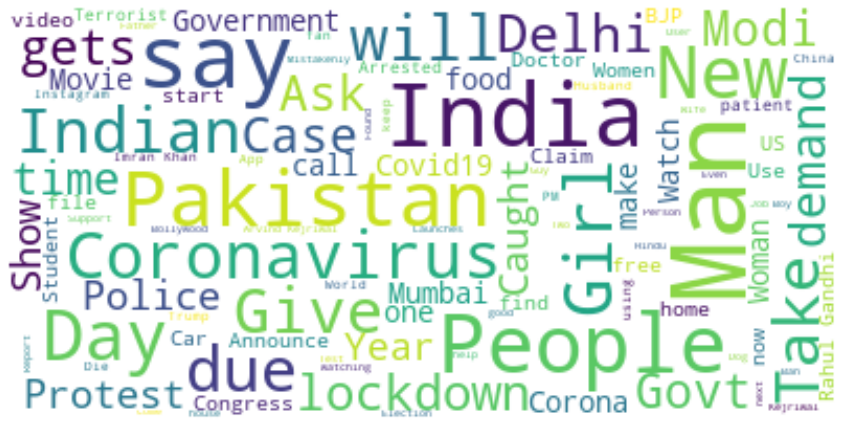

In [29]:
combined_fake = []
for i in range(df1_cleaned_fake.shape[0]):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', df1_cleaned_fake.iloc[i,0])
    combined_fake.append(sentence)

texts = " ".join(text for text in combined_fake)
print ("There are {} words in the combination of all Fake News.".format(len(texts)))
stopwords = set(STOPWORDS)
wordcloud_fake = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(texts)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

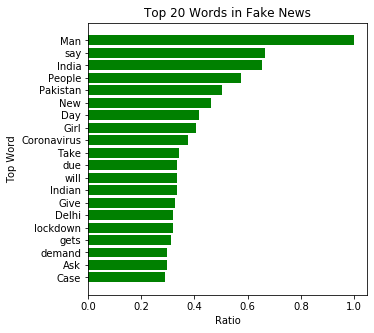

In [30]:
Top20FakeWords = dict(itertools.islice(wordcloud_fake.words_.items(), 20))
TopWords_fake = []
Ratios_fake = []

for name, age in Top20FakeWords.items():
    TopWords_fake.append(name)
    Ratios_fake.append(age)

plt.figure(figsize=[5,5])
plt.barh(TopWords_fake,Ratios_fake, align='center', color='green')
plt.xlabel('Ratio')
plt.ylabel('Top Word')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in Fake News')

plt.show()